In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.io import loadmat
from scipy.signal import savgol_filter
%matplotlib inline

In [2]:
f=np.arange(0,5,0.001)
omega=2*math.pi*f
d_omega=omega[1]-omega[0]
alpha, beta, K, g =6,12,20,10 # beta around 11~13 appears negative group delay
A=K*((beta-g)*(-omega**2+alpha*beta)+omega**2*(alpha+beta))/((-omega**2+alpha*beta)**2+omega**2*(alpha+beta)**2)
B=K*omega*(-omega**2+alpha*beta+(alpha+beta)*(g-beta))/((-omega**2+alpha*beta)**2+omega**2*(alpha+beta)**2)

In [3]:
phi=np.arctan(B/A)
for i in range(len(phi)-1):
    if abs(phi[i+1]-phi[i])>2:
        phi[i+1]=phi[i+1]-math.pi
tau_g=-np.diff(phi)/d_omega
gain=np.sqrt(A**2+B**2)

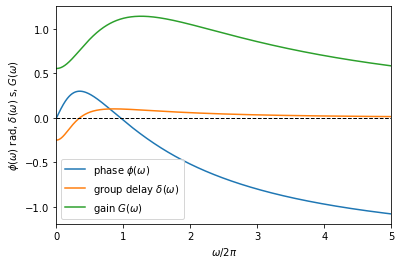

In [15]:
fana,axana=plt.subplots()
plt.plot(f,phi,label=r'phase $\phi(\omega)$')
plt.plot(f[:-1],tau_g,label=r'group delay $\delta(\omega)$')
plt.plot(f,gain,label=r'gain $G(\omega)$')
plt.axhline(ls='--',linewidth=1,color='k')
plt.xlim(0,5)
plt.xlabel(r'$\omega/2\pi$')
plt.ylabel(r'$\phi(\omega)$ rad, $\delta(\omega)$ s, $G(\omega)$')
plt.legend()

In [16]:
# fana.savefig('F:/我的雲端硬碟/Master Thesis/Figures/appendix/FF model analytic.pdf')